In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [60]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = pd.read_csv('/Users/sayenaqureshi/Desktop/Getting started/dataset 1.csv')

In [62]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [63]:
data.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [64]:
data.shape

(2200, 8)

In [65]:
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [66]:
data.duplicated().sum()

np.int64(0)

In [67]:
data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [69]:
data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [70]:
data.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
dtype: int64

In [71]:
data['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [72]:
data['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [73]:
crop_summary = pd.pivot_table(data,index=['Crop'],aggfunc='mean')

In [74]:
crop_summary

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,pH_Value
Crop,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,6.732778


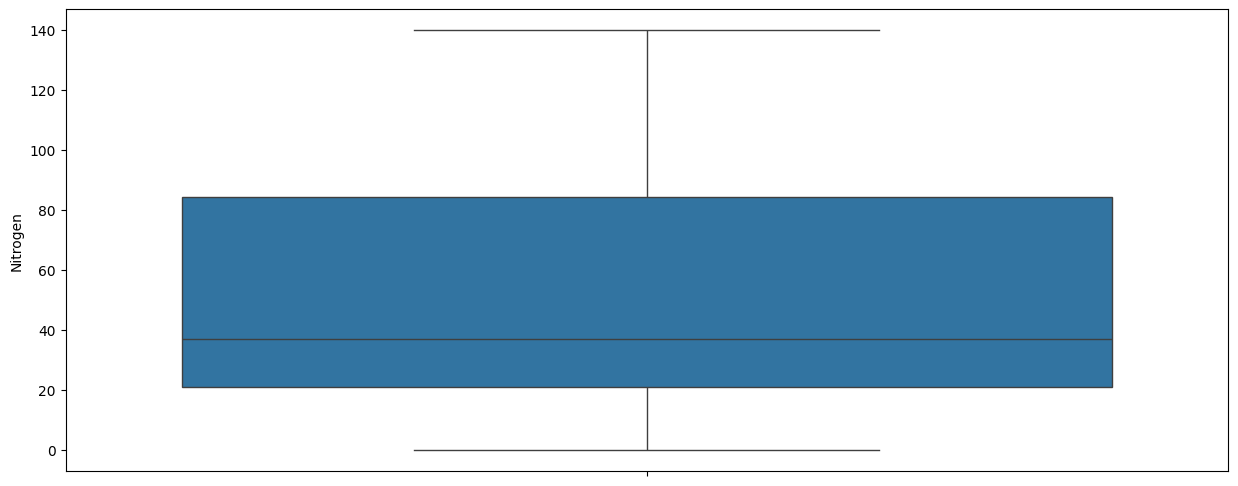

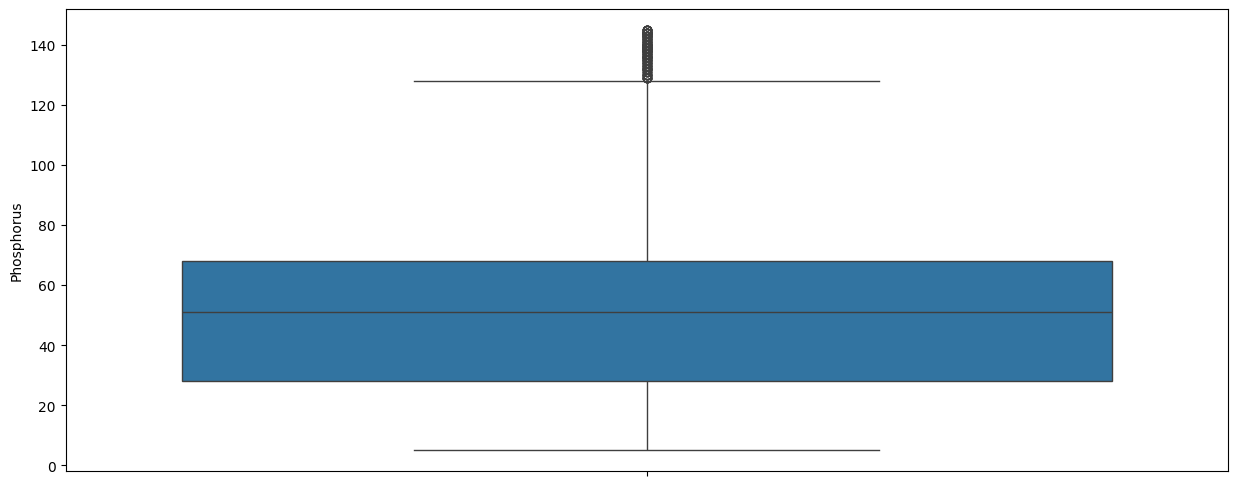

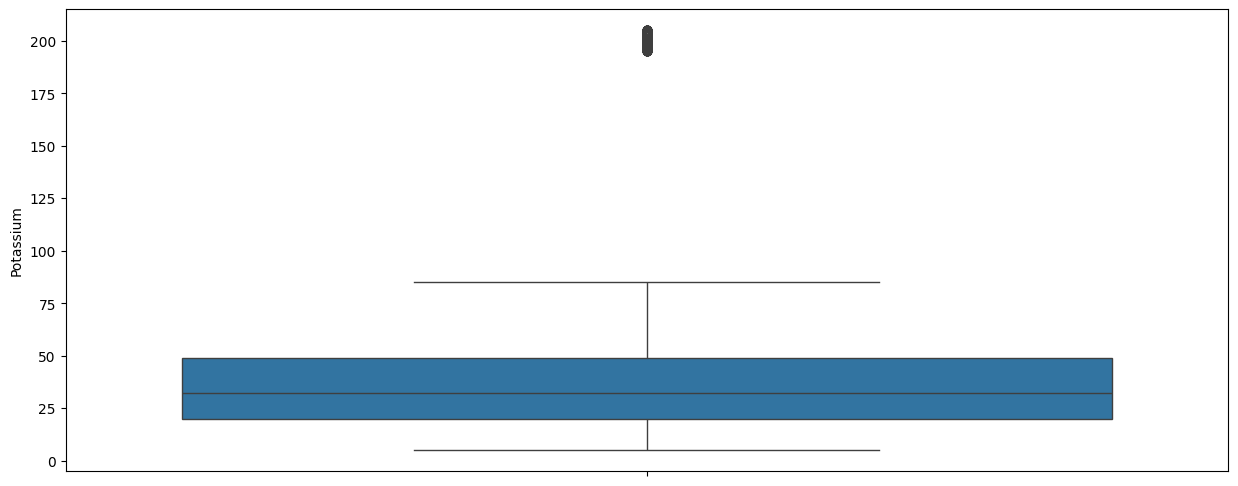

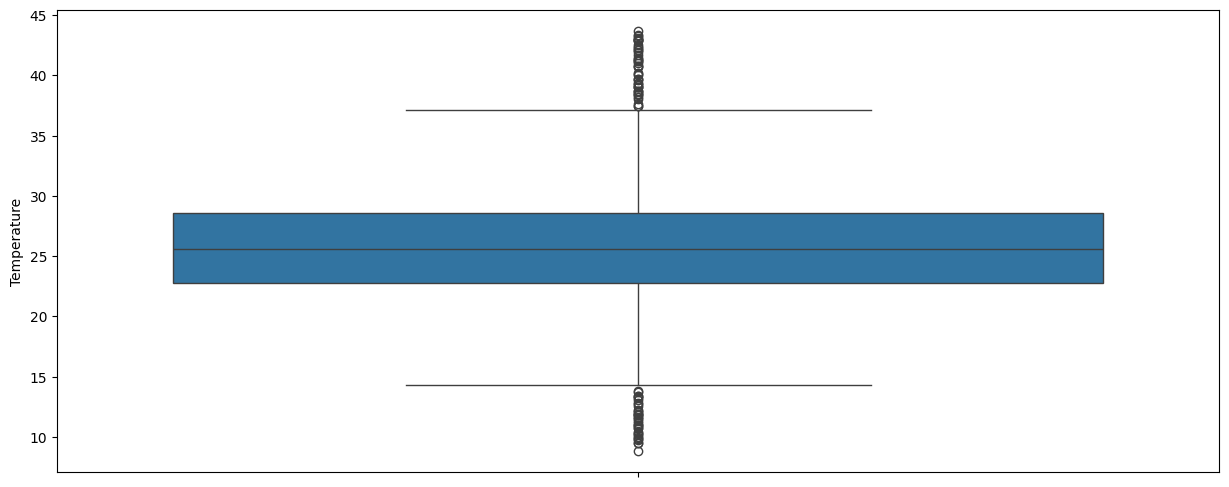

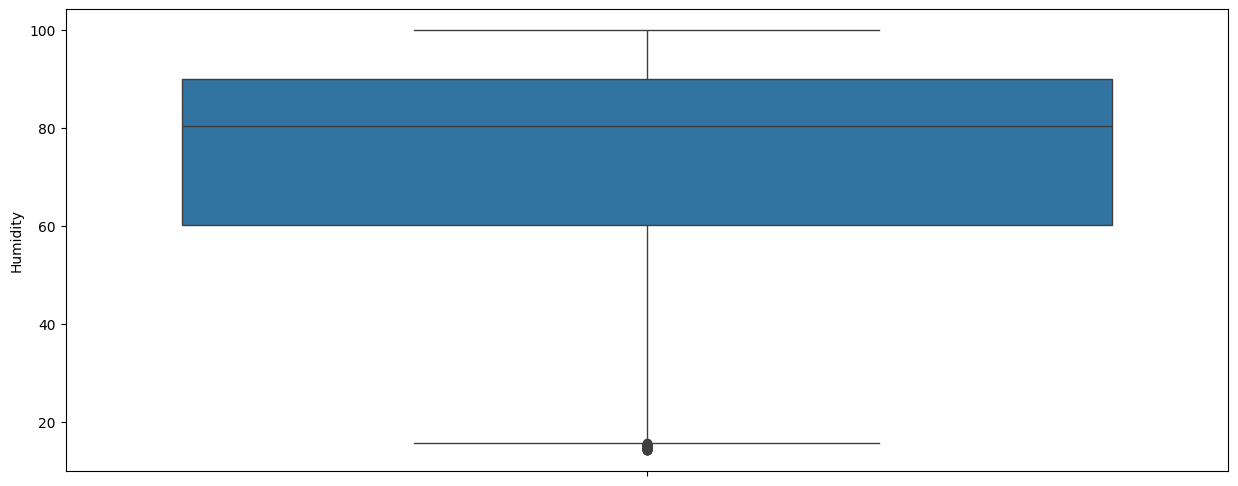

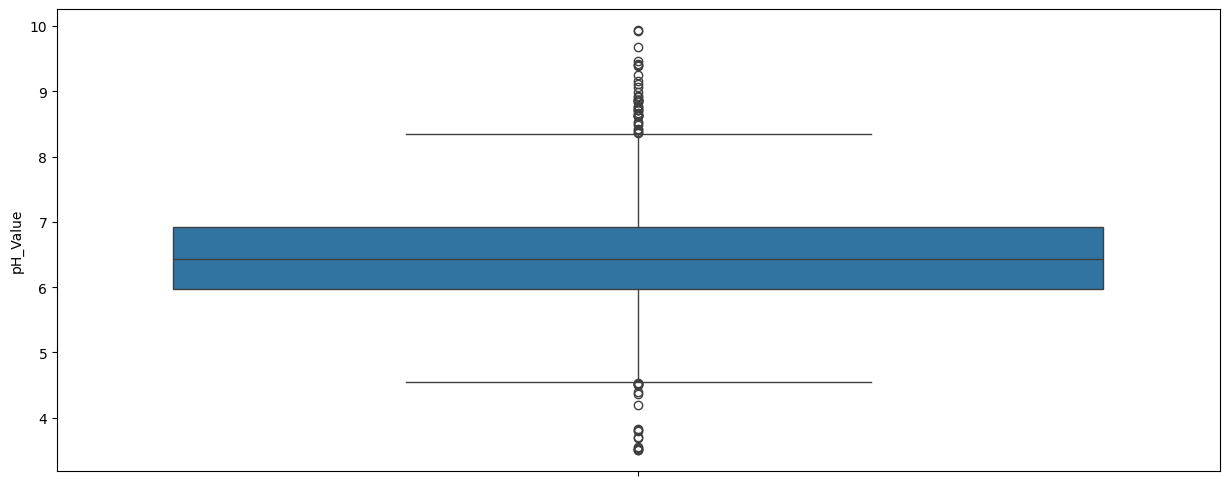

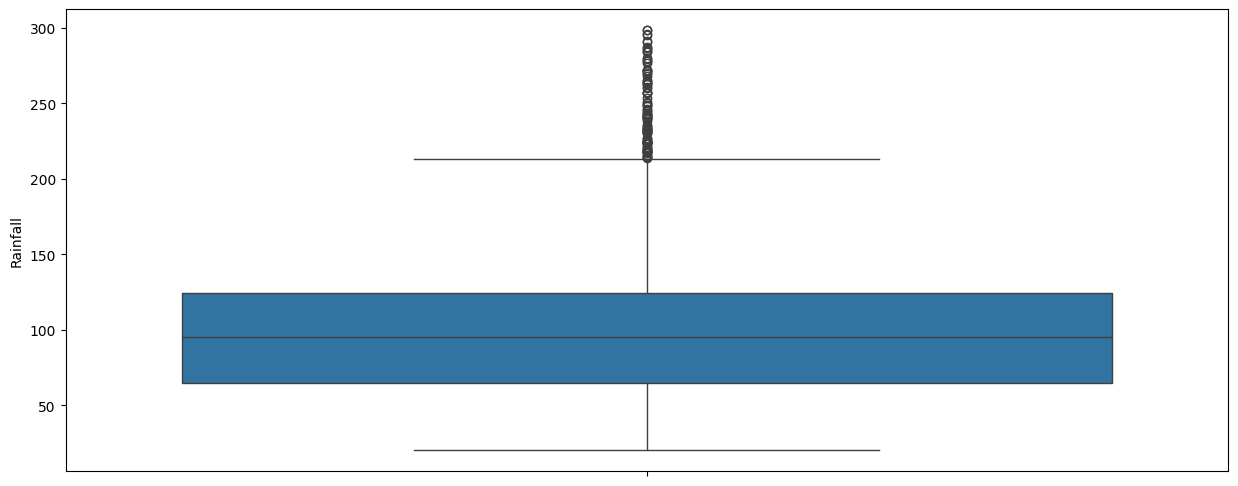

In [75]:
data1 = data[['Nitrogen','Phosphorus','Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]
for i in data1.columns:
             plt.figure(figsize=(15,6))
             sns.boxplot(data1[i])
             plt.xticks(rotation = 90)
             plt.show()

In [76]:
crop_summary_new = crop_summary.reset_index()

In [77]:
crop_summary_new

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,5.749411


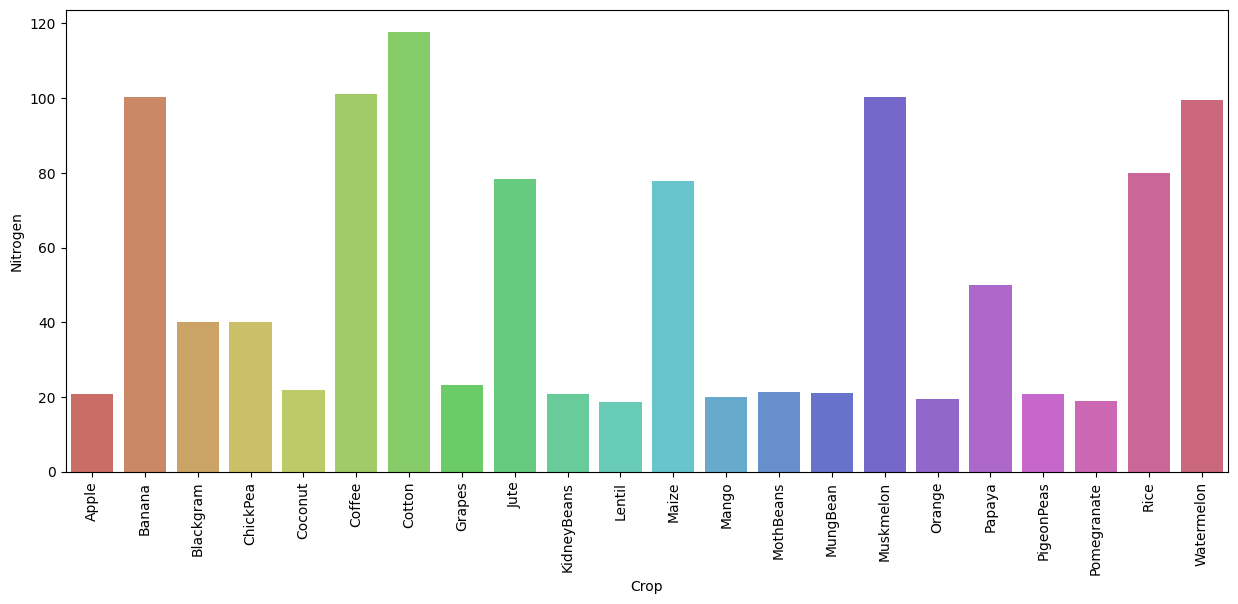

In [78]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'Nitrogen', x = 'Crop', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [79]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [80]:
fig1 = px.bar(crop_summary_new, x='Crop', y='Nitrogen')
fig1.show()

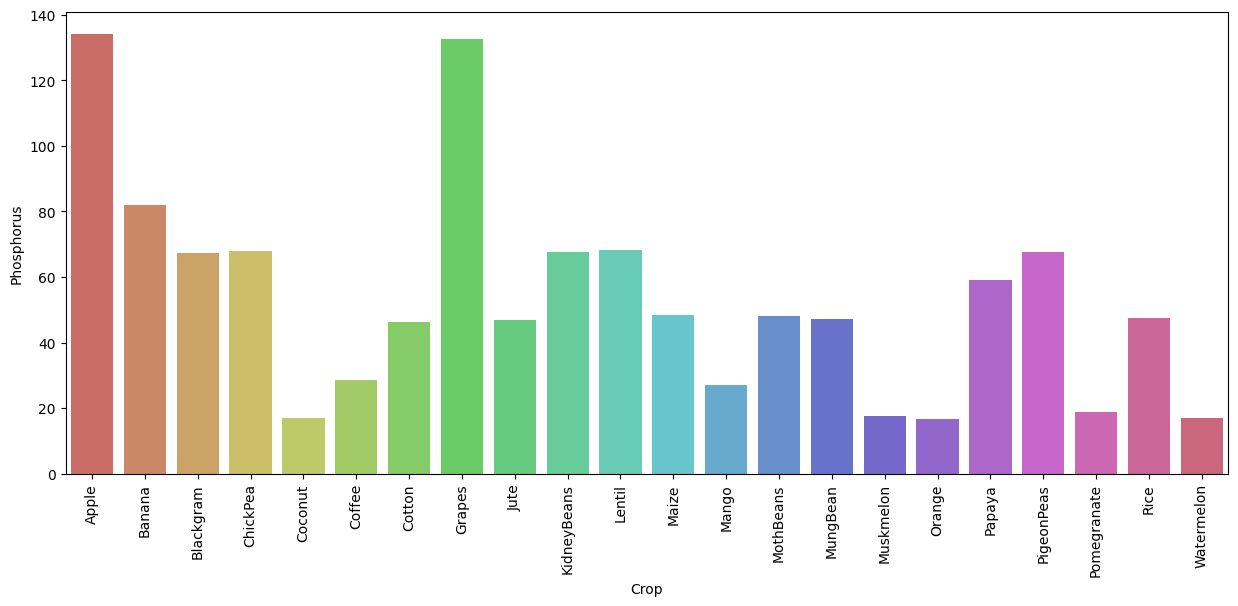

In [81]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'Phosphorus', x = 'Crop', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [82]:
fig2 = px.bar(crop_summary_new, x='Crop', y='Phosphorus')
fig2.show()

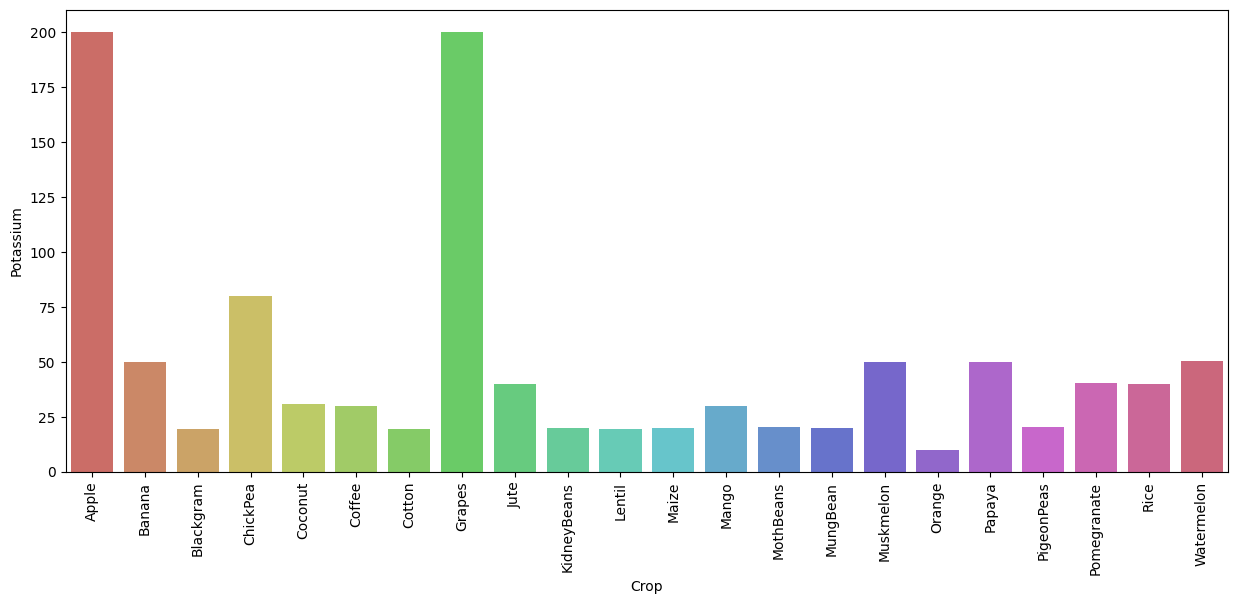

In [83]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'Potassium', x = 'Crop', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [84]:
fig3 = px.bar(crop_summary_new, x='Crop', y='Potassium')
fig3.show()

In [85]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [86]:
import random

In [87]:
crop_summary_N = crop_summary.sort_values(by='Nitrogen',
                                          ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['Nitrogen'][0:10].sort_values().index,
    'x' : crop_summary_N['Nitrogen'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['Nitrogen'][-10:].index,
    'x' : crop_summary_N['Nitrogen'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [88]:
crop_summary_P = crop_summary.sort_values(by='Phosphorus', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['Phosphorus'][0:10].sort_values().index,
    'x' : crop_summary_P['Phosphorus'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['Phosphorus'][-10:].index,
    'x' : crop_summary_P['Phosphorus'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [89]:
crop_summary_K = crop_summary.sort_values(by='Potassium', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['Potassium'][0:10].sort_values().index,
    'x' : crop_summary_K['Potassium'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['Potassium'][-10:].index,
    'x' : crop_summary_K['Potassium'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                  height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [90]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Nitrogen'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Phosphorus'],
    name='Phosphorus',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Potassium'],
    name='Potassium',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()


In [91]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [92]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='Rice']
values = [rice_npk['Nitrogen'][0], rice_npk['Phosphorus'][0], rice_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='Cotton']
values = [cotton_npk['Nitrogen'][0], cotton_npk['Phosphorus'][0], cotton_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='Jute']
values = [jute_npk['Nitrogen'][0], jute_npk['Phosphorus'][0], jute_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='Maize']
values = [maize_npk['Nitrogen'][0], maize_npk['Phosphorus'][0], maize_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = crop_summary[crop_summary.index=='Lentil']
values = [lentil_npk['Nitrogen'][0], lentil_npk['Phosphorus'][0], lentil_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=17, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=17, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=17, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=17, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=17, showarrow=False)])
fig.show()

In [93]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']

fig = make_subplots(
    rows=1,
    cols=5,
    specs=[[{'type': 'domain'}] * 5],
    horizontal_spacing=0.10  # Added spacing between pie charts
)

# Pie chart for Rice
rice_npk = crop_summary[crop_summary.index == 'Rice']
values = [rice_npk['Nitrogen'][0], rice_npk['Phosphorus'][0], rice_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Rice"), 1, 1)

# Pie chart for Cotton
cotton_npk = crop_summary[crop_summary.index == 'Cotton']
values = [cotton_npk['Nitrogen'][0], cotton_npk['Phosphorus'][0], cotton_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Cotton"), 1, 2)

# Pie chart for Jute
jute_npk = crop_summary[crop_summary.index == 'Jute']
values = [jute_npk['Nitrogen'][0], jute_npk['Phosphorus'][0], jute_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Jute"), 1, 3)

# Pie chart for Maize
maize_npk = crop_summary[crop_summary.index == 'Maize']
values = [maize_npk['Nitrogen'][0], maize_npk['Phosphorus'][0], maize_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Maize"), 1, 4)

# Pie chart for Lentil
lentil_npk = crop_summary[crop_summary.index == 'Lentil']
values = [lentil_npk['Nitrogen'][0], lentil_npk['Phosphorus'][0], lentil_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Lentil"), 1, 5)

# Update layout and annotations
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for Rice, Cotton, Jute, Maize, Lentil",
    width=1100,  # Wider layout
    annotations=[
        dict(text='Rice', x=0.05, y=0.8, font_size=16, showarrow=False),
        dict(text='Cotton', x=0.25, y=0.8, font_size=16, showarrow=False),
        dict(text='Jute', x=0.50, y=0.8, font_size=16, showarrow=False),
        dict(text='Maize', x=0.75, y=0.8, font_size=16, showarrow=False),
        dict(text='Lentil', x=0.95, y=0.8, font_size=16, showarrow=False)
    ]
)

fig.show()


In [94]:
labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]

fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors = ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

# First row
apple_npk = crop_summary[crop_summary.index == 'Apple']
values = [apple_npk['Nitrogen'][0], apple_npk['Phosphorus'][0], apple_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Apple", marker_colors=cafe_colors), 1, 1)

banana_npk = crop_summary[crop_summary.index == 'Banana']
values = [banana_npk['Nitrogen'][0], banana_npk['Phosphorus'][0], banana_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Banana", marker_colors=cafe_colors), 1, 2)

grapes_npk = crop_summary[crop_summary.index == 'Grapes']
values = [grapes_npk['Nitrogen'][0], grapes_npk['Phosphorus'][0], grapes_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Grapes", marker_colors=cafe_colors), 1, 3)

orange_npk = crop_summary[crop_summary.index == 'Orange']
values = [orange_npk['Nitrogen'][0], orange_npk['Phosphorus'][0], orange_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Orange", marker_colors=cafe_colors), 1, 4)

mango_npk = crop_summary[crop_summary.index == 'Mango']
values = [mango_npk['Nitrogen'][0], mango_npk['Phosphorus'][0], mango_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Mango", marker_colors=cafe_colors), 1, 5)

# Second row
coconut_npk = crop_summary[crop_summary.index == 'Coconut']
values = [coconut_npk['Nitrogen'][0], coconut_npk['Phosphorus'][0], coconut_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Coconut", marker_colors=cafe_colors), 2, 1)

papaya_npk = crop_summary[crop_summary.index == 'Papaya']
values = [papaya_npk['Nitrogen'][0], papaya_npk['Phosphorus'][0], papaya_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Papaya", marker_colors=cafe_colors), 2, 2)

pomegranate_npk = crop_summary[crop_summary.index=='Pomegranate']
values = [pomegranate_npk['Nitrogen'][0], pomegranate_npk['Phosphorus'][0], pomegranate_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = crop_summary[crop_summary.index=='Watermelon']
values = [watermelon_npk['Nitrogen'][0], watermelon_npk['Phosphorus'][0], watermelon_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = crop_summary[crop_summary.index=='Muskmelon']
values = [muskmelon_npk['Nitrogen'][0], muskmelon_npk['Phosphorus'][0], muskmelon_npk['Potassium'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=17, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=17, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=17, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=17, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=17, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=17, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=17, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=17, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=17, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=17, showarrow=False)])
fig.show()


In [95]:
crop_scatter = data[(data['Crop']=='Rice') |
                      (data['Crop']=='Jute') |
                      (data['Crop']=='Cotton') |
                     (data['Crop']=='Maize') |
                     (data['Crop']=='Lentil')]

fig = px.scatter(crop_scatter, x="Temperature", y="Humidity", color="Crop", symbol="Crop")
fig.update_layout(plot_bgcolor='yellow')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

In [96]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["Rainfall", "Temperature", "Humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [97]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
print(correlation_matrix)


             Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026504  0.190688  0.096683   
Phosphorus  -0.231460    1.000000   0.736232    -0.127541 -0.118734 -0.138019   
Potassium   -0.140512    0.736232   1.000000    -0.160387  0.190859 -0.169503   
Temperature  0.026504   -0.127541  -0.160387     1.000000  0.205320 -0.017795   
Humidity     0.190688   -0.118734   0.190859     0.205320  1.000000 -0.008483   
pH_Value     0.096683   -0.138019  -0.169503    -0.017795 -0.008483  1.000000   
Rainfall     0.059020   -0.063839  -0.053461    -0.030084  0.094423 -0.109069   

             Rainfall  
Nitrogen     0.059020  
Phosphorus  -0.063839  
Potassium   -0.053461  
Temperature -0.030084  
Humidity     0.094423  
pH_Value    -0.109069  
Rainfall     1.000000  


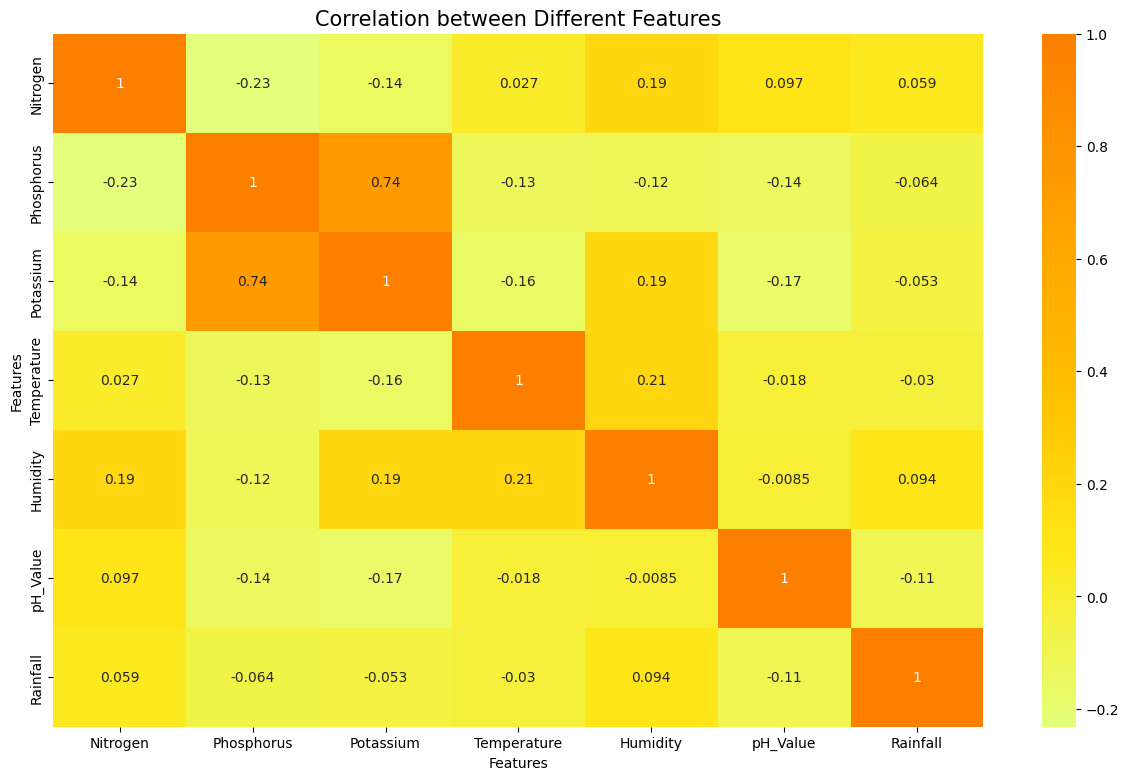

In [98]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Plot correlation heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Wistia')
ax.set(xlabel='Features', ylabel='Features')
plt.title('Correlation between Different Features', fontsize=15, color='black')
plt.show()

In [99]:
X = data.drop('Crop', axis=1)
y = data['Crop']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,shuffle = True, random_state = 0)

LightGBM

In [101]:
from lightgbm import LGBMClassifier
model_lgb = LGBMClassifier()
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 1474, number of used features: 7
[LightGBM] [Info] Start training from score -3.061629
[LightGBM] [Info] Start training from score -3.076227
[LightGBM] [Info] Start training from score -3.121348
[LightGBM] [Info] Start training from score -3.184861
[LightGBM] [Info] Start training from score -3.047240
[LightGBM] [Info] Start training from score -3.076227
[LightGBM] [Info] Start training from score -3.019069
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.061629
[LightGBM] [Info] Start training from score -3.047240
[LightGBM] [Info] Start training from score -2.991670
[LightGBM] [Info] Start training from score -3.033055
[LightGBM] [Info] Start training from score -3.033055
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier()

In [102]:
y_pred_lgb = model_lgb.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_lgb))

LightGBM Model accuracy score: 0.9890


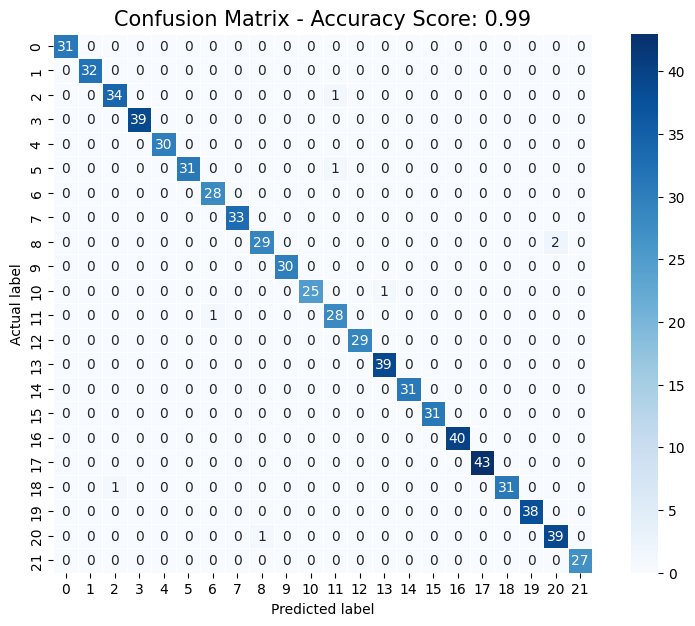

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model_lgb.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', linewidths=0.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix - Accuracy Score: {accuracy_score(y_test, y_pred):.2f}', size=15)
plt.show()


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        31
      Banana       1.00      1.00      1.00        32
   Blackgram       0.97      0.97      0.97        35
    ChickPea       1.00      1.00      1.00        39
     Coconut       1.00      1.00      1.00        30
      Coffee       1.00      0.97      0.98        32
      Cotton       0.97      1.00      0.98        28
      Grapes       1.00      1.00      1.00        33
        Jute       0.97      0.94      0.95        31
 KidneyBeans       1.00      1.00      1.00        30
      Lentil       1.00      0.96      0.98        26
       Maize       0.93      0.97      0.95        29
       Mango       1.00      1.00      1.00        29
   MothBeans       0.97      1.00      0.99        39
    MungBean       1.00      1.00      1.00        31
   Muskmelon       1.00      1.00      1.00        31
      Orange       1.00      1.00      1.00        40
      Papaya       1.00    

In [106]:
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

In [107]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

model = OneVsRestClassifier(lgb.LGBMClassifier())
model.fit(X_train, y_train_bin)
y_score = model.predict_proba(X_test)
lgb_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("LightGBM AUC-ROC Score:", lgb_auc)


[LightGBM] [Info] Number of positive: 69, number of negative: 1405
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 1474, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046811 -> initscore=-3.013686
[LightGBM] [Info] Start training from score -3.013686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

DecisionTreeClassifier

In [109]:
# Create and train the decision tree classifier
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [110]:
y_pred_dt = classifier_dt.predict(X_test)


In [111]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_dt))

Decision Tree Model accuracy score: 0.9848


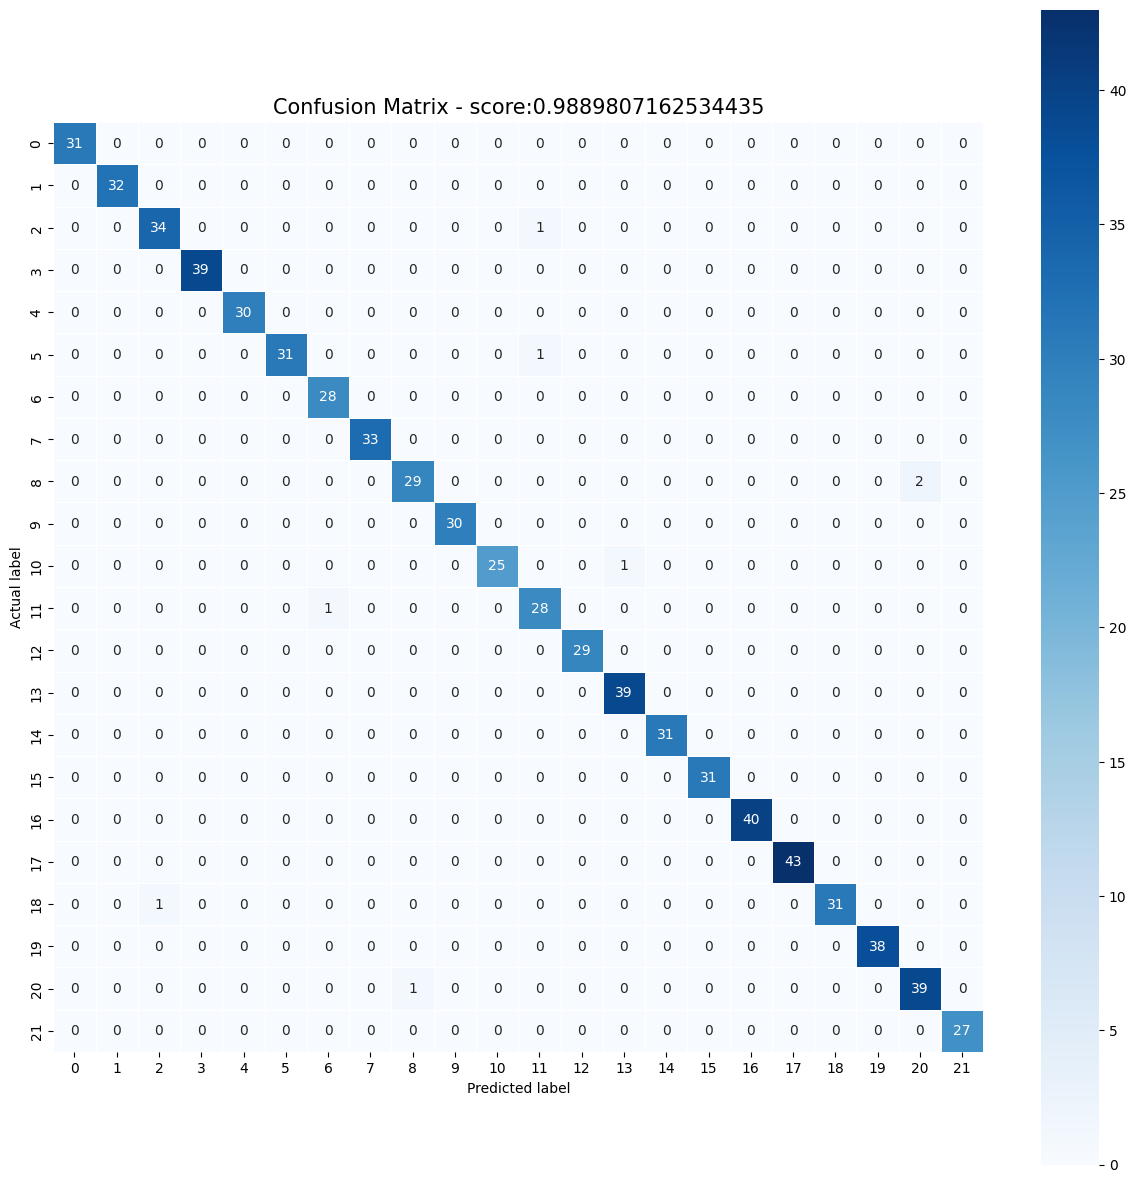

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [113]:
model = OneVsRestClassifier(DecisionTreeClassifier())
model.fit(X_train, y_train_bin)
y_score = model.predict_proba(X_test)
dt_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("Decision Tree AUC-ROC Score:", dt_auc)

Decision Tree AUC-ROC Score: 0.97575628236423


In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        31
      Banana       1.00      1.00      1.00        32
   Blackgram       0.97      0.97      0.97        35
    ChickPea       1.00      1.00      1.00        39
     Coconut       1.00      1.00      1.00        30
      Coffee       1.00      0.97      0.98        32
      Cotton       0.97      1.00      0.98        28
      Grapes       1.00      1.00      1.00        33
        Jute       0.97      0.94      0.95        31
 KidneyBeans       1.00      1.00      1.00        30
      Lentil       1.00      0.96      0.98        26
       Maize       0.93      0.97      0.95        29
       Mango       1.00      1.00      1.00        29
   MothBeans       0.97      1.00      0.99        39
    MungBean       1.00      1.00      1.00        31
   Muskmelon       1.00      1.00      1.00        31
      Orange       1.00      1.00      1.00        40
      Papaya       1.00    

RandomForestClassifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [116]:
y_pred= classifier_rf.predict(X_test)

In [117]:
y_pred_rf = classifier_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_rf))

Random Forest Model accuracy score: 0.9945


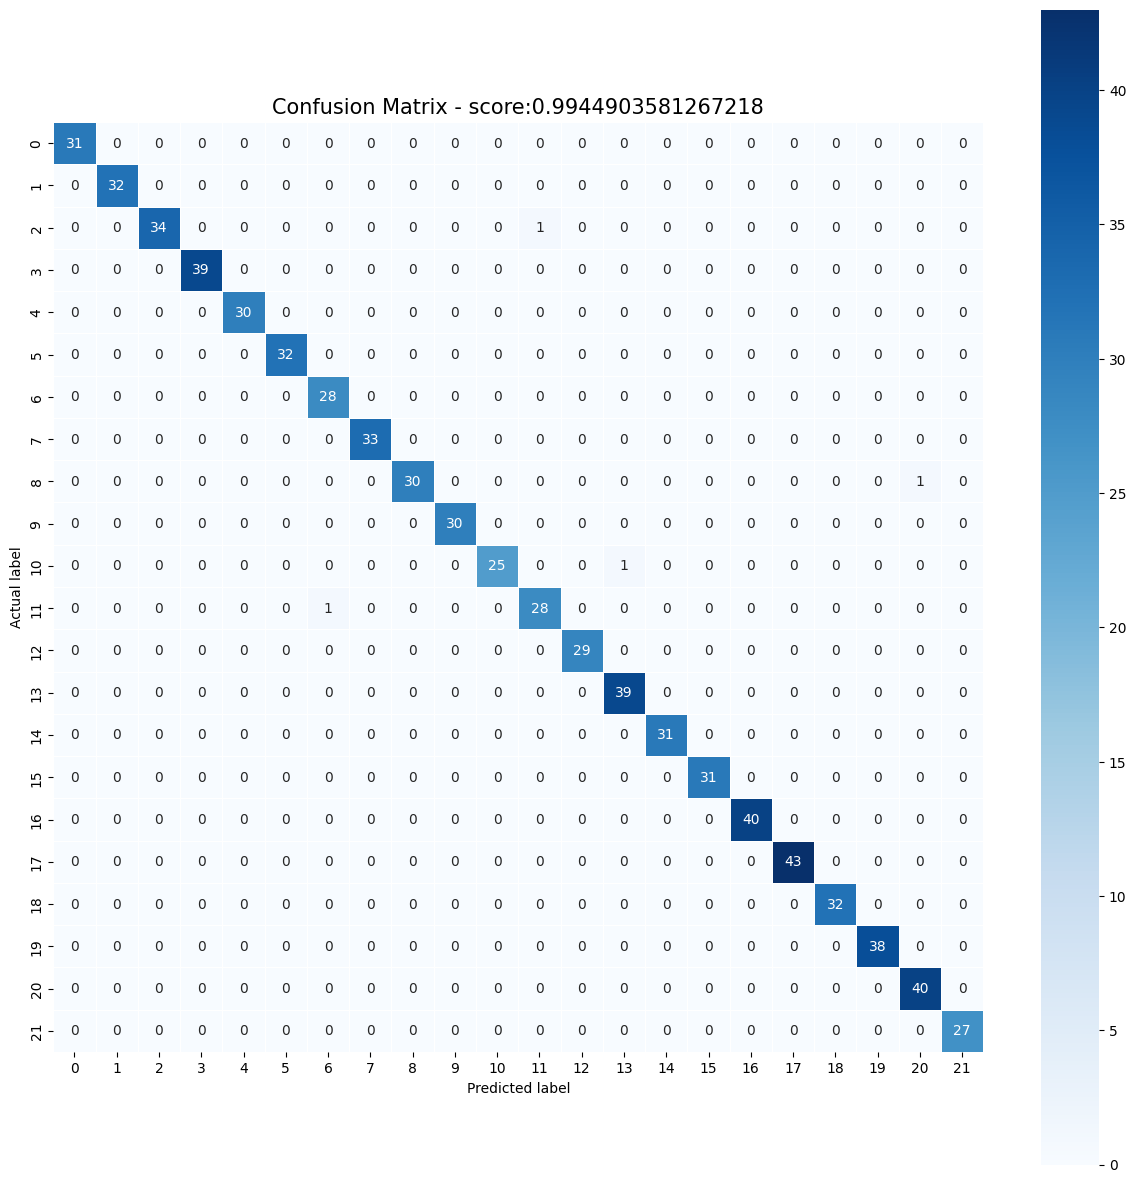

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [119]:
model = OneVsRestClassifier(RandomForestClassifier())
model.fit(X_train, y_train_bin)
y_score = model.predict_proba(X_test)
rf_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("Random Forest AUC-ROC Score:", rf_auc)

Random Forest AUC-ROC Score: 0.9998488504882872


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        31
      Banana       1.00      1.00      1.00        32
   Blackgram       1.00      0.97      0.99        35
    ChickPea       1.00      1.00      1.00        39
     Coconut       1.00      1.00      1.00        30
      Coffee       1.00      1.00      1.00        32
      Cotton       0.97      1.00      0.98        28
      Grapes       1.00      1.00      1.00        33
        Jute       1.00      0.97      0.98        31
 KidneyBeans       1.00      1.00      1.00        30
      Lentil       1.00      0.96      0.98        26
       Maize       0.97      0.97      0.97        29
       Mango       1.00      1.00      1.00        29
   MothBeans       0.97      1.00      0.99        39
    MungBean       1.00      1.00      1.00        31
   Muskmelon       1.00      1.00      1.00        31
      Orange       1.00      1.00      1.00        40
      Papaya       1.00    

LogisticRegression

In [121]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [122]:
y_pred_lr = classifier_lr.predict(X_test)

In [123]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_lr))


Logistic Regression Model accuracy score: 0.9435


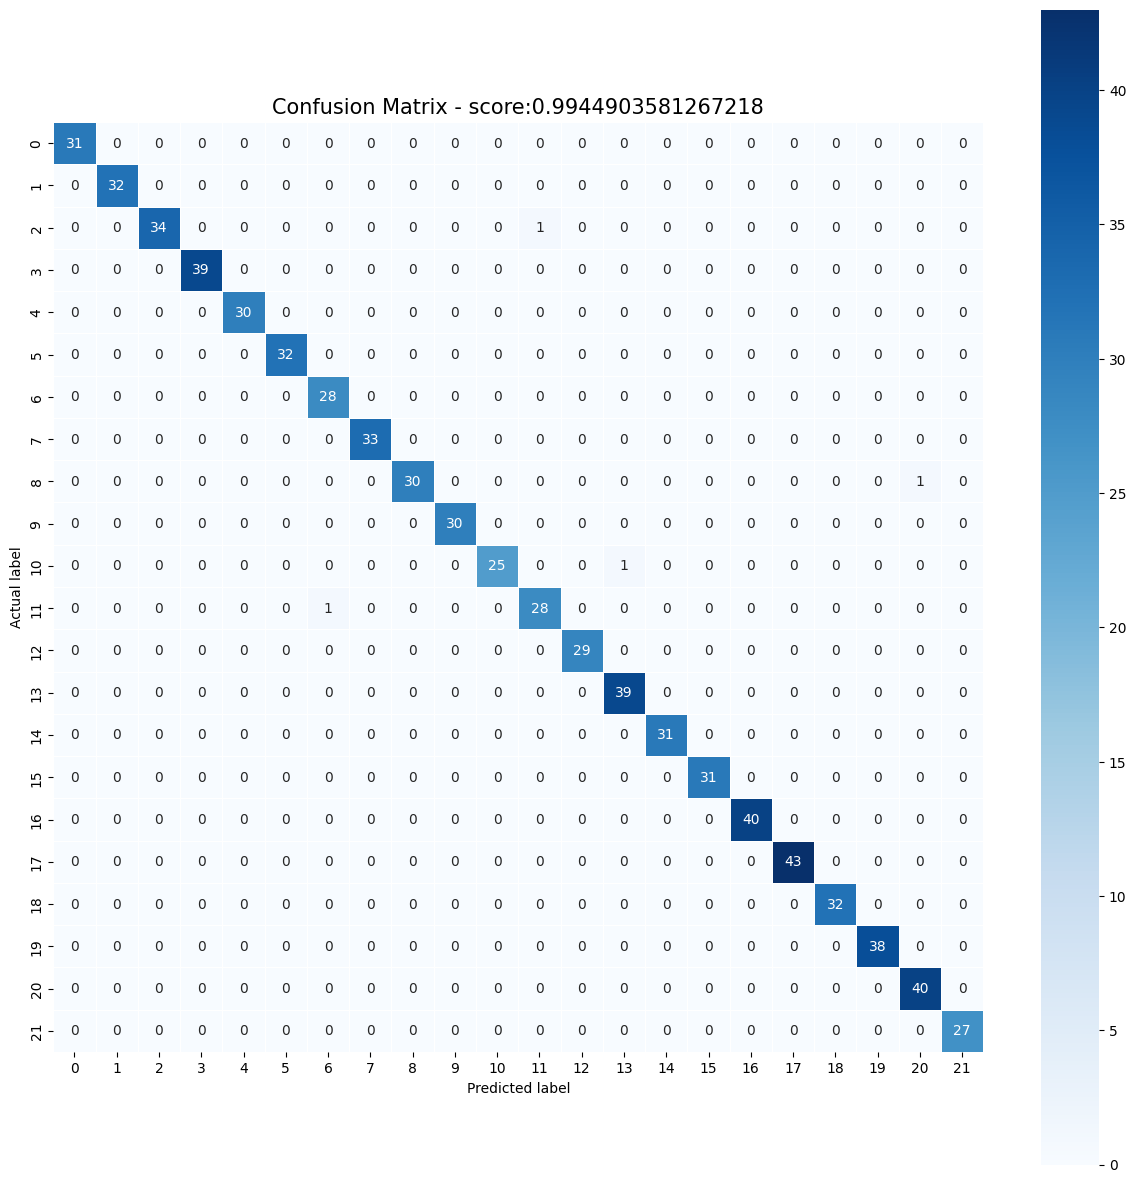

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [125]:
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train_bin)
y_score = model.predict_proba(X_test)
logistic_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("Logistic Regression AUC-ROC Score:", logistic_auc)

Logistic Regression AUC-ROC Score: 0.9890102024048004


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        31
      Banana       1.00      1.00      1.00        32
   Blackgram       1.00      0.97      0.99        35
    ChickPea       1.00      1.00      1.00        39
     Coconut       1.00      1.00      1.00        30
      Coffee       1.00      1.00      1.00        32
      Cotton       0.97      1.00      0.98        28
      Grapes       1.00      1.00      1.00        33
        Jute       1.00      0.97      0.98        31
 KidneyBeans       1.00      1.00      1.00        30
      Lentil       1.00      0.96      0.98        26
       Maize       0.97      0.97      0.97        29
       Mango       1.00      1.00      1.00        29
   MothBeans       0.97      1.00      0.99        39
    MungBean       1.00      1.00      1.00        31
   Muskmelon       1.00      1.00      1.00        31
      Orange       1.00      1.00      1.00        40
      Papaya       1.00    

Support Vector Machine

In [127]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', random_state=0)
classifier_svm.fit(X_train, y_train)

SVC(random_state=0)

In [128]:
y_pred_svm = classifier_svm.predict(X_test)

In [129]:
# Calculate and print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Model accuracy score: {0:0.4f}'.format(accuracy_svm))

SVM Model accuracy score: 0.9683


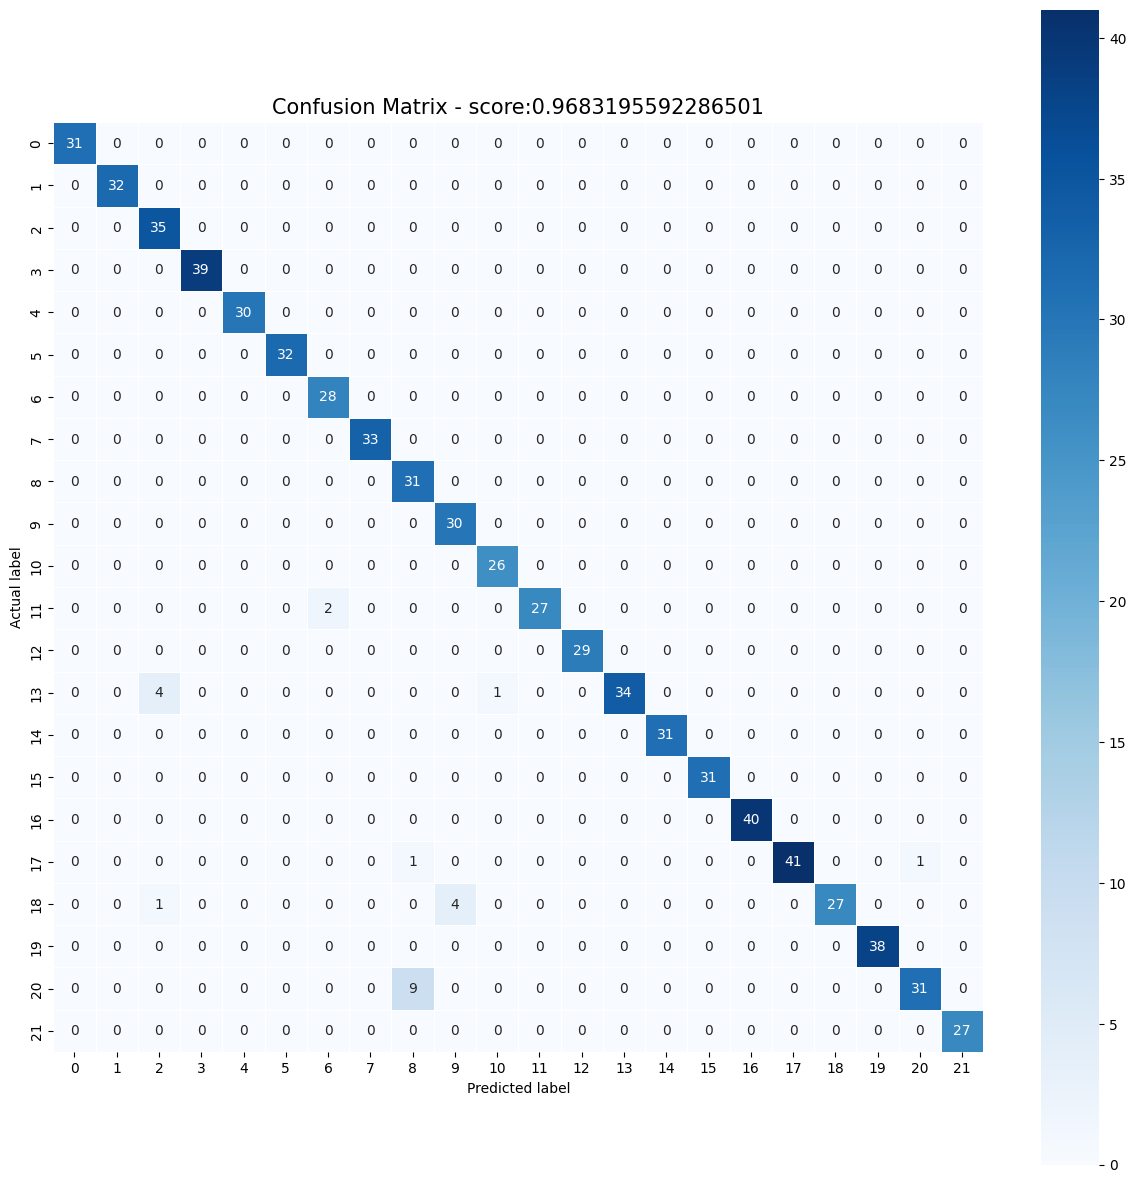

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix - score:' + str(accuracy_score(y_test, y_pred_svm))
plt.title(all_sample_title, size=15)
plt.show()

In [131]:
model = OneVsRestClassifier(SVC(probability=True))
model.fit(X_train, y_train_bin)
y_score = model.predict_proba(X_test)
svm_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("SVM AUC-ROC Score:", svm_auc)

SVM AUC-ROC Score: 0.9989881005131696


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        31
      Banana       1.00      1.00      1.00        32
   Blackgram       0.88      1.00      0.93        35
    ChickPea       1.00      1.00      1.00        39
     Coconut       1.00      1.00      1.00        30
      Coffee       1.00      1.00      1.00        32
      Cotton       0.93      1.00      0.97        28
      Grapes       1.00      1.00      1.00        33
        Jute       0.76      1.00      0.86        31
 KidneyBeans       0.88      1.00      0.94        30
      Lentil       0.96      1.00      0.98        26
       Maize       1.00      0.93      0.96        29
       Mango       1.00      1.00      1.00        29
   MothBeans       1.00      0.87      0.93        39
    MungBean       1.00      1.00      1.00        31
   Muskmelon       1.00      1.00      1.00        31
      Orange       1.00      1.00      1.00        40
      Papaya       1.00    

K-NN

In [133]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [134]:
y_pred_knn = classifier_knn.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('KNN Model accuracy score: {0:0.4f}'.format(accuracy_knn))

KNN Model accuracy score: 0.9821


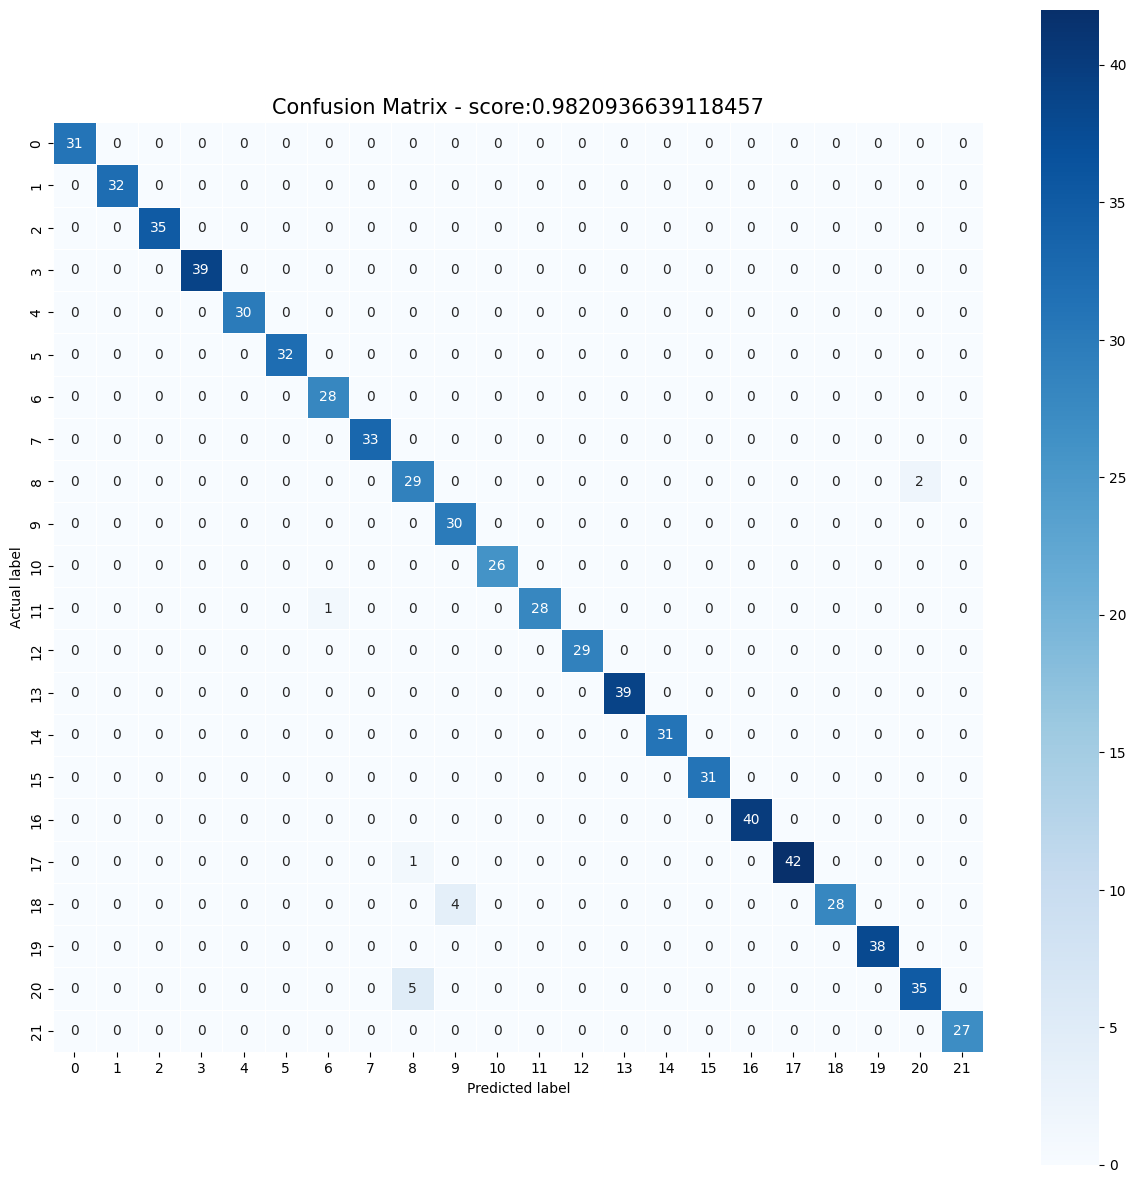

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix - score:' + str(accuracy_score(y_test, y_pred_knn))
plt.title(all_sample_title, size=15)
plt.show()

In [137]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train_bin)
y_score = model.predict_proba(X_test)
knn_auc = roc_auc_score(y_test_bin, y_score, average="macro")
print("KNN AUC-ROC Score:", knn_auc)

KNN AUC-ROC Score: 0.9992579442157539


In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        31
      Banana       1.00      1.00      1.00        32
   Blackgram       1.00      1.00      1.00        35
    ChickPea       1.00      1.00      1.00        39
     Coconut       1.00      1.00      1.00        30
      Coffee       1.00      1.00      1.00        32
      Cotton       0.97      1.00      0.98        28
      Grapes       1.00      1.00      1.00        33
        Jute       0.83      0.94      0.88        31
 KidneyBeans       0.88      1.00      0.94        30
      Lentil       1.00      1.00      1.00        26
       Maize       1.00      0.97      0.98        29
       Mango       1.00      1.00      1.00        29
   MothBeans       1.00      1.00      1.00        39
    MungBean       1.00      1.00      1.00        31
   Muskmelon       1.00      1.00      1.00        31
      Orange       1.00      1.00      1.00        40
      Papaya       1.00    

In [139]:
import pandas as pd

# Create a dictionary of model names and their AUC-ROC scores
auc_scores = {
    'Logistic Regression': logistic_auc,
    'K-Nearest Neighbors': knn_auc,
    'SVM': svm_auc,
    'Decision Tree': dt_auc,
    'Random Forest': rf_auc,
    'LightGBM': lgb_auc
}

# Convert to DataFrame
auc_table = pd.DataFrame(list(auc_scores.items()), columns=['Model', 'AUC-ROC Score'])

# Sort by score (optional)
auc_table = auc_table.sort_values(by='AUC-ROC Score', ascending=False).reset_index(drop=True)

# Display
print(auc_table)


                 Model  AUC-ROC Score
0        Random Forest       0.999849
1             LightGBM       0.999283
2  K-Nearest Neighbors       0.999258
3                  SVM       0.998988
4  Logistic Regression       0.989010
5        Decision Tree       0.975756


In [140]:
accuracy_dict = {
    'Model': ['Random Forest', 'Decision Tree', 'LightGBM', 'Logistic Regression', 'SVM', 'KNN'],
    'Accuracy': [accuracy_rf, accuracy_dt, accuracy_lgb, accuracy_lr, accuracy_svm, accuracy_knn]
}

accuracy_df = pd.DataFrame(accuracy_dict)

print(accuracy_df)

                 Model  Accuracy
0        Random Forest  0.994490
1        Decision Tree  0.984848
2             LightGBM  0.988981
3  Logistic Regression  0.943526
4                  SVM  0.968320
5                  KNN  0.982094


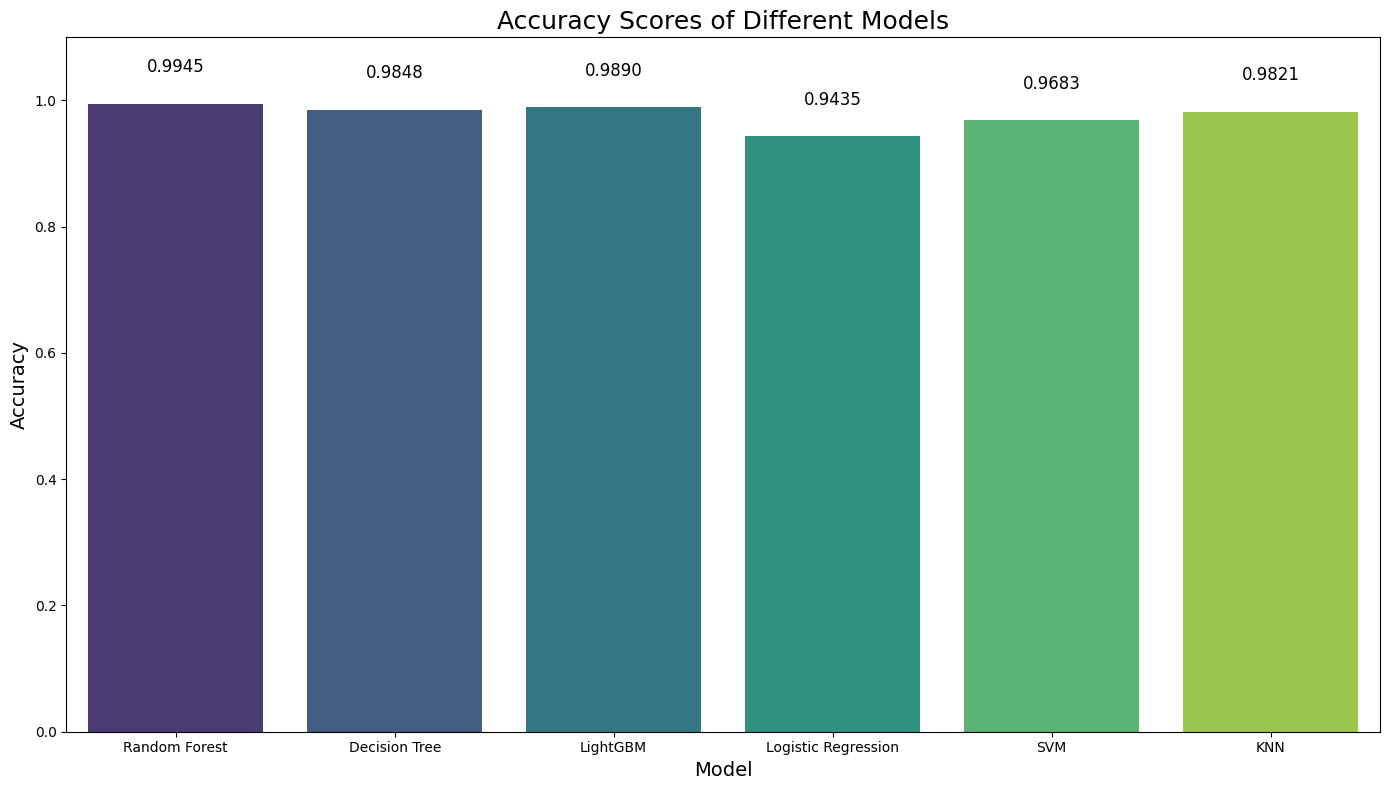

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')

plt.title('Accuracy Scores of Different Models', fontsize=18)
plt.ylim(0, 1.1)  # Extend y-limit to make space above bars
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)

for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.05, f"{row['Accuracy']:.4f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


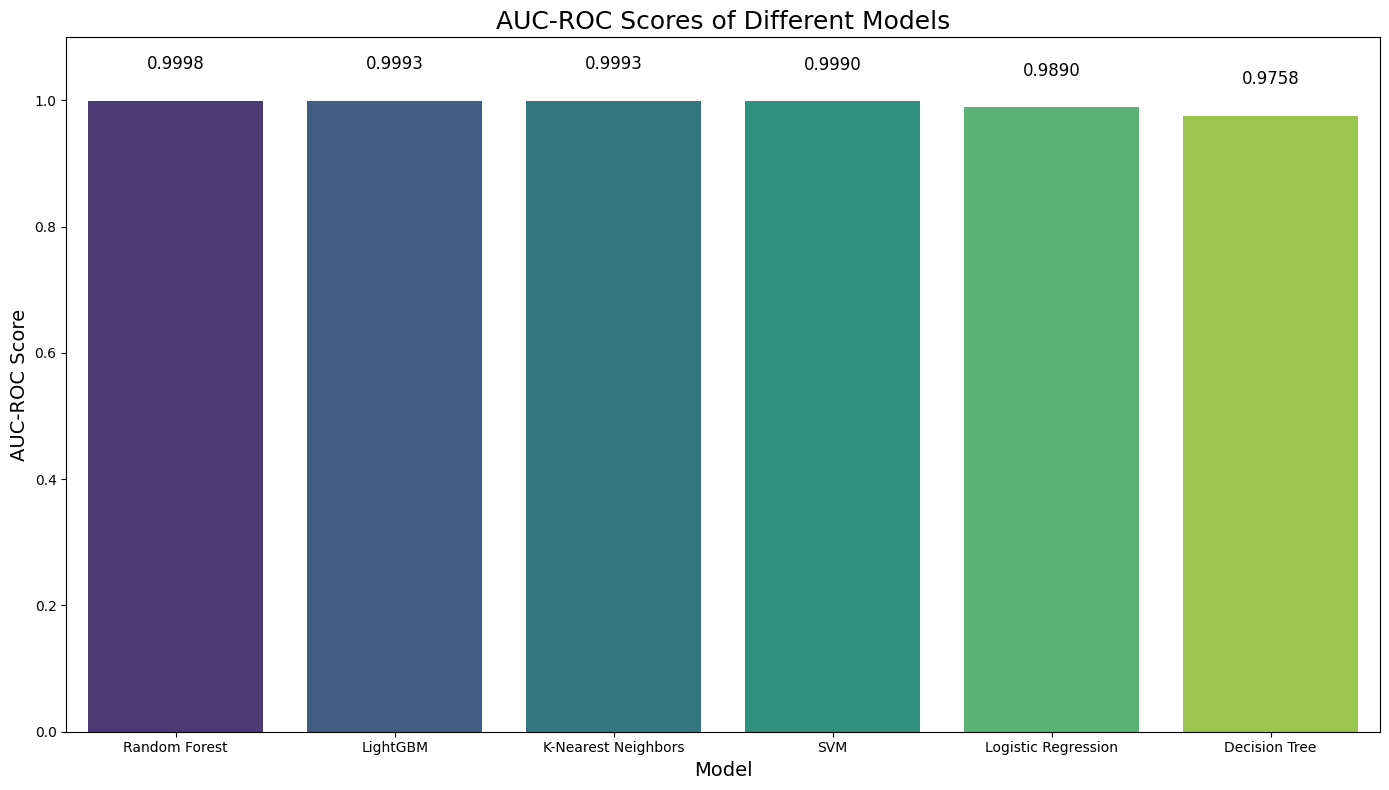

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(x='Model', y='AUC-ROC Score', data=auc_table, palette='viridis')

plt.title('AUC-ROC Scores of Different Models', fontsize=18)
plt.ylim(0, 1.1)  # Extend y-limit to make space above bars
plt.ylabel('AUC-ROC Score', fontsize=14)
plt.xlabel('Model', fontsize=14)

for index, row in auc_table.iterrows():
    plt.text(index, row['AUC-ROC Score'] + 0.05, f"{row['AUC-ROC Score']:.4f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


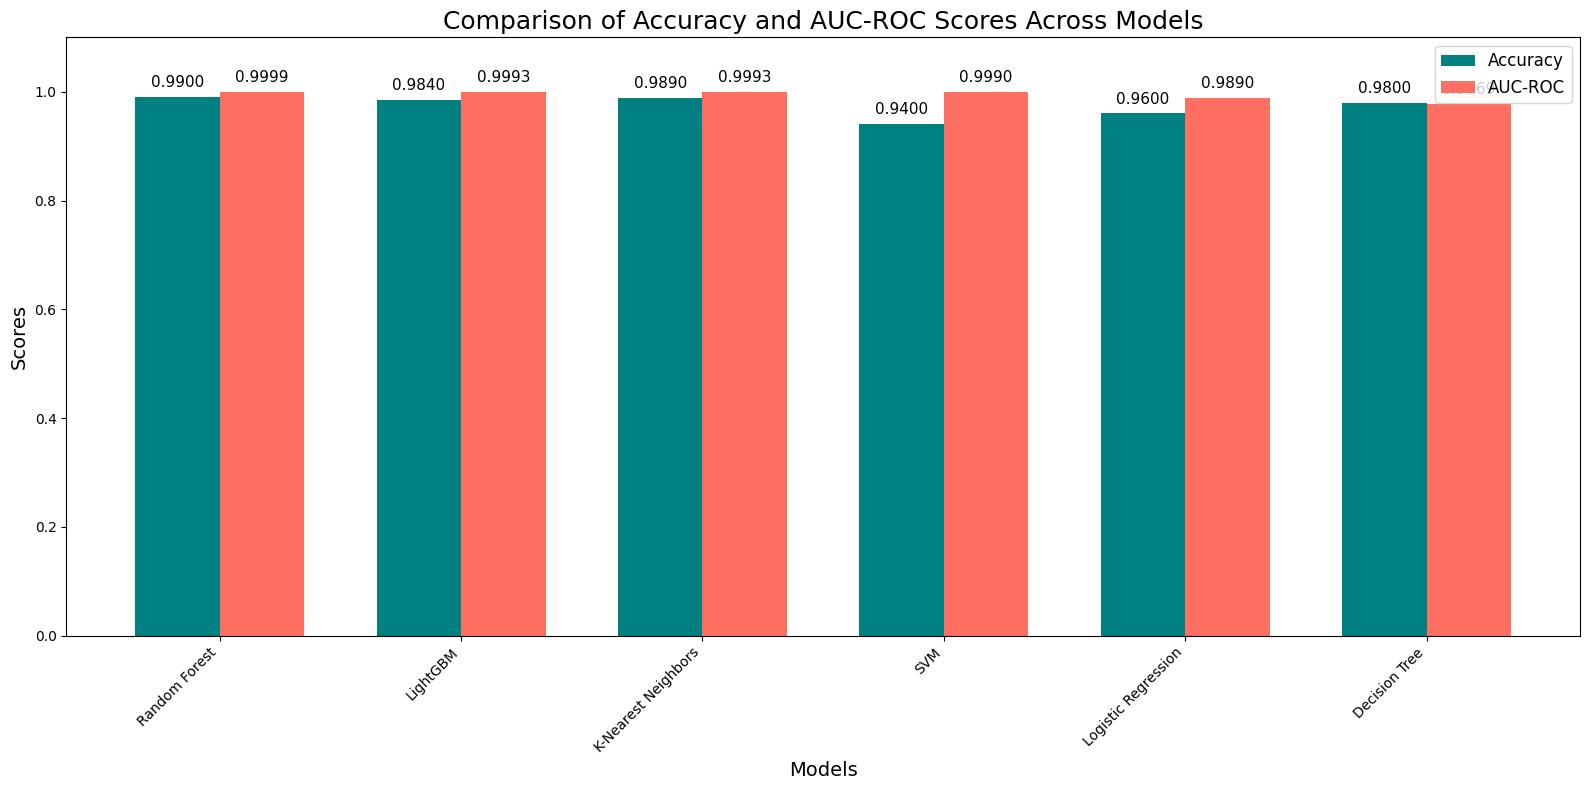

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data - replace with your real data or load from CSV
data = {
    'Model': ['Random Forest', 'LightGBM', 'K-Nearest Neighbors', 'SVM','Logistic Regression','Decision Tree'],
    'Accuracy': [0.99, 0.984, 0.989, 0.94,0.96,0.98],
    'AUC-ROC Score': [0.9999, 0.9993, 0.9993, 0.9990, 0.9890,0.9769]
}

combined_df = pd.DataFrame(data)

models = combined_df['Model']
accuracy = combined_df['Accuracy']
auc_roc = combined_df['AUC-ROC Score']

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(16,8))

# Fresh colors — deep teal and coral
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='#008080')  # Teal
rects2 = ax.bar(x + width/2, auc_roc, width, label='AUC-ROC', color='#FF6F61')    # Coral

ax.set_ylabel('Scores', fontsize=14)
ax.set_xlabel('Models', fontsize=14)
ax.set_title('Comparison of Accuracy and AUC-ROC Scores Across Models', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylim(0, 1.1)
ax.legend(fontsize=12)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


In [145]:
import pickle
with open('classifier1.pkl', 'wb') as f:
    pickle.dump(classifier_dt, f)
